In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
    array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq


In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = '/Users/paulrobustelli/Desktop/Manuscript_Files/AR_Figures_12.20/'


In [3]:
E7_rg_file = '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_epi7170_12.20.21/rg.dat'
E2_rg_file = '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_epi002_12.20.21/rg.dat'
E7_rg = np.loadtxt(E7_rg_file)
E2_rg = np.loadtxt(E2_rg_file)
E7dir = '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_epi7170_12.20.21/'
E2dir = '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_epi002_12.20.21/'
apodir = '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO/'

E7_byres_traj = np.loadtxt(E7dir+'contacts.traj.dat').astype(int)
E2_byres_traj = np.loadtxt(E2dir+'contacts.traj.dat').astype(int)
E7_contacts_by_frame = np.sum(E7_byres_traj, axis=1)
E2_contacts_by_frame = np.sum(E2_byres_traj, axis=1)


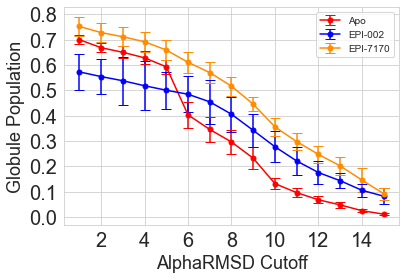

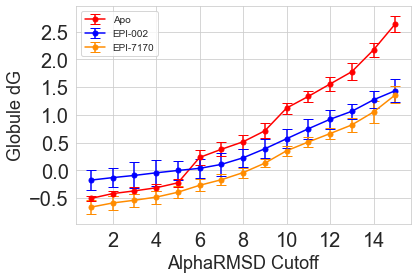

<Figure size 432x288 with 0 Axes>

In [4]:
globpop = 'Pop.vs.Sacut.dat'
globdg = 'dGglob.vs.Sacut.dat'

E7_globpop = np.loadtxt(E7dir+globpop)
E2_globpop = np.loadtxt(E2dir+globpop)
Apo_globpop = np.loadtxt(apodir+globpop)

plt.errorbar(Apo_globpop[:, 0], Apo_globpop[:, 1], yerr=Apo_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='red', label='Apo')
plt.errorbar(E2_globpop[:, 0], E2_globpop[:, 1], yerr=E2_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7_globpop[:, 0], E7_globpop[:, 1], yerr=E7_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='darkorange', label='EPI-7170')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Globule Population', fontsize=18)
plt.xlabel('AlphaRMSD Cutoff', fontsize=18)
plt.legend(loc='upper right')
plt.savefig(outdir+'E2.E7.Apo.GlobulePopV_Sacut.pdf', bbox_inches='tight')
plt.show()
plt.clf()

E7_globdG = np.loadtxt(E7dir+globdg)
E2_globdG = np.loadtxt(E2dir+globdg)
Apo_globdG = np.loadtxt(apodir+globdg)

plt.errorbar(Apo_globdG[:, 0], Apo_globdG[:, 1], yerr=Apo_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='red', label='Apo')
plt.errorbar(E2_globdG[:, 0], E2_globdG[:, 1], yerr=E2_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7_globdG[:, 0], E7_globdG[:, 1], yerr=E7_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='darkorange', label='EPI-7170')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Globule dG', fontsize=18)
plt.xlabel('AlphaRMSD Cutoff', fontsize=18)
plt.legend(loc='upper left')
plt.savefig(outdir+'E2.E7.Apo.GlobdG_V_Sacut.pdf', bbox_inches='tight')
plt.show()
plt.clf()


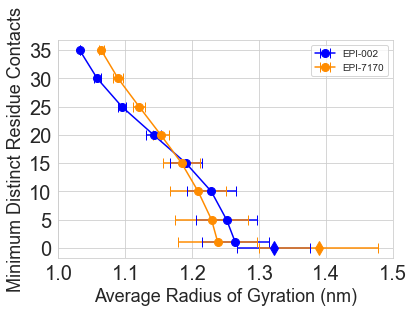

In [5]:
contacts = [1, 5, 10, 15, 20, 25, 30, 35]
E7_contact = []
E2_contact = []
E7rg = []
E2rg = []
E7rg_sd = []
E2rg_sd = []

frames = np.where(E7_contacts_by_frame == 0)[0]
E7rg0 = np.average(E7_rg[frames])
E7rg0_var = np.var(E7_rg[frames])

frames = np.where(E2_contacts_by_frame == 0)[0]
E2rg0 = np.average(E2_rg[frames])
E2rg0_var = np.var(E2_rg[frames])

for i in contacts:
    frames = np.where(E7_contacts_by_frame >= i)[0]
    E7_contact.append(i)
    E7rg.append(np.average(E7_rg[frames]))
    E7rg_sd.append(np.var(E7_rg[frames]))

    frames = np.where(E2_contacts_by_frame >= i)[0]
    E2_contact.append(i)
    E2rg.append(np.average(E2_rg[frames]))
    E2rg_sd.append(np.var(E2_rg[frames]))

plt.errorbar(E2rg0, 0, xerr=E2rg0_var, marker='d',
             markersize=10, capsize=5, color='blue')
plt.errorbar(E7rg0, 0, xerr=E7rg0_var, marker='d',
             markersize=10, capsize=5, color='darkorange')

plt.errorbar(E2rg, E2_contact, xerr=E2rg_sd, marker='o',
             markersize=8, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7rg, E7_contact, xerr=E7rg_sd, marker='o',
             markersize=8, capsize=5, color='darkorange', label='EPI-7170')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1.0, 1.5)
plt.ylabel('Minimum Distinct Residue Contacts', fontsize=18)
plt.xlabel('Average Radius of Gyration (nm)', fontsize=18)
plt.legend(loc='upper right')
plt.savefig(outdir+'E2.E7.rgVcontacts.pdf', bbox_inches='tight')
plt.show()


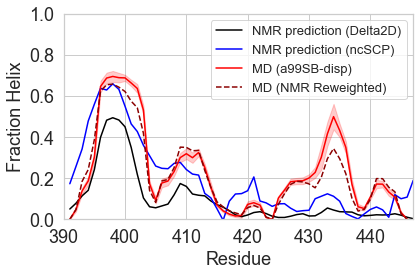

In [12]:
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'
Helix_apo = np.loadtxt(apodir+file)
Helix_E2 = np.loadtxt(E2dir+file)
Helix_E7 = np.loadtxt(E7dir+file)
Helix_E2_bound = np.loadtxt(E2dir+boundfile)
Helix_E7_bound = np.loadtxt(E7dir+boundfile)

Helix_reweight = np.loadtxt(
    '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO_reweight_12.20.21/Hprop.reweight.dat')
d2d_helix = np.loadtxt(
    '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO_reweight_12.20.21/AF1.d2d.Hpred.R2R3.noseq.dat')
ncSCP_helix = np.loadtxt(
    '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO_reweight_12.20.21/R2R3.AF1.ncSCP.dat')


Apo_u = Helix_apo[:, 1]+Helix_apo[:, 2]
Apo_l = Helix_apo[:, 1]-Helix_apo[:, 2]
E2_u = Helix_E2[:, 1]+Helix_E2[:, 2]
E2_l = Helix_E2[:, 1]-Helix_E2[:, 2]
E7_u = Helix_E7[:, 1]+Helix_E7[:, 2]
E7_l = Helix_E7[:, 1]-Helix_E7[:, 2]

sns.lineplot(x=d2d_helix[:, 0], y=d2d_helix[:, 1],
             color='black', label='NMR prediction (Delta2D)')
sns.lineplot(x=ncSCP_helix[:, 0], y=ncSCP_helix[:, 1],
             color='blue', label='NMR prediction (ncSCP)')
sns.lineplot(x=Helix_apo[:, 0], y=Helix_apo[:, 1],
             color='red', label='MD (a99SB-disp)')
sns.lineplot(x=Helix_reweight[:, 0], y=Helix_reweight[:, 1],
             color='darkred', linestyle='dashed', label='MD (NMR Reweighted)')

plt.fill_between(Helix_apo[:, 0], Apo_u, Apo_l, color='red', alpha=0.2)

plt.ylim(0.0, 1.0)

plt.xlim(390, 447)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('Fraction Helix', fontsize=18)
plt.legend(loc='upper right', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig(outdir+'Hcomp.apo.NMR.pdf', bbox_inches='tight')


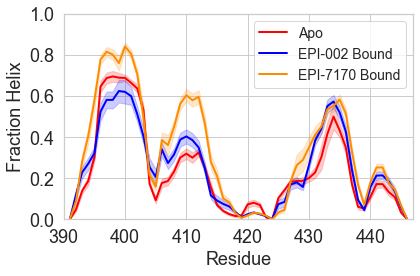

In [13]:
sns.set(style='whitegrid')

Apo_u = Helix_apo[:, 1]+Helix_apo[:, 2]
Apo_l = Helix_apo[:, 1]-Helix_apo[:, 2]
E2_u = Helix_E2_bound[:, 1]+Helix_E2_bound[:, 2]
E2_l = Helix_E2_bound[:, 1]-Helix_E2_bound[:, 2]
E7_u = Helix_E7_bound[:, 1]+Helix_E7_bound[:, 2]
E7_l = Helix_E7_bound[:, 1]-Helix_E7_bound[:, 2]


sns.lineplot(x=Helix_apo[:, 0], y=Helix_apo[:, 1],
             color='red', label='Apo', linewidth=2)
sns.lineplot(x=Helix_E2_bound[:, 0], y=Helix_E2_bound[:, 1],
             color='blue', label='EPI-002 Bound', linewidth=2)
sns.lineplot(x=Helix_E7_bound[:, 0], y=Helix_E7_bound[:, 1],
             color='darkorange', label='EPI-7170 Bound', linewidth=2)

plt.fill_between(Helix_apo[:, 0], Apo_u, Apo_l, color='red', alpha=0.2)
plt.fill_between(Helix_E2_bound[:, 0], E2_u, E2_l, color='blue', alpha=0.2)
plt.fill_between(Helix_E7_bound[:, 0], E7_u,
                 E7_l, color='darkorange', alpha=0.2)

plt.ylim(0.0, 1.0)

plt.xlim(390, 447)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('Fraction Helix', fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(outdir+'Hcomp.apo.e2.e7.pdf', bbox_inches='tight')


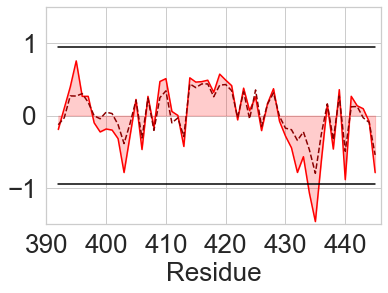

<Figure size 432x288 with 0 Axes>

In [15]:
CA_deviation = np.loadtxt(
    '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO_reweight_12.20.21/CA.initialVexp.dat')
CA_reweight_deviation = np.loadtxt(
    '/Users/paulrobustelli/Desktop/Trajectories/AR_3.18.2021/R2_R3_APO_reweight_12.20.21/CA.reweightVexp.dat')
CAexpVsim = CA_deviation
upper = np.copy(CAexpVsim)
lower = np.copy(CAexpVsim)
zeros = np.copy(CAexpVsim)

for i in range(0, len(upper[:, 0])):
    upper[i, 1] = 0.94
    lower[i, 1] = -0.94
    zeros[i, 1] = 0

sns.set(style='whitegrid')
sns.lineplot(x=CAexpVsim[:, 0], y=-CAexpVsim[:, 1], color='red')
sns.lineplot(x=CA_reweight_deviation[:, 0], y=-
             CA_reweight_deviation[:, 1], color='darkred', linestyle='dashed')
sns.lineplot(x=upper[:, 0], y=upper[:, 1], color='black')
sns.lineplot(x=lower[:, 0], y=lower[:, 1], color='black')
plt.fill_between(CAexpVsim[:, 0], -CAexpVsim[:, 1],
                 zeros[i, 1], color='red', alpha=0.2)
plt.ylim(-1.5, 1.5)
plt.xlim(390, 446)
plt.xticks(fontsize=26)
plt.yticks([-1.0, 0, 1.0], fontsize=26)
plt.xlabel('Residue', fontsize=26)

plt.grid(True)
plt.savefig(outdir+'CA.expCS_v_MD.pdf', bbox_inches='tight')
plt.show()
plt.clf()


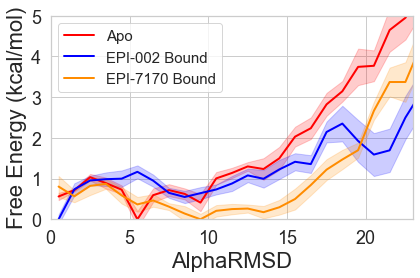

In [16]:
# SA_dG_1d:
file = 'Sa.bound.dG.dat'
Rg_apo = np.loadtxt(apodir+'Sa_dg.dat')
Rg_E2 = np.loadtxt(E2dir+'Sa.bound.dG.dat')
Rg_E7 = np.loadtxt(E7dir+'Sa.bound.dG.dat')

plt.clf()
plt.plot(Rg_apo[:, 0], Rg_apo[:, 1], c='red', label='Apo', linewidth=2)
plt.plot(Rg_E2[:, 0], Rg_E2[:, 1], c='blue',
         label='EPI-002 Bound', linewidth=2)
plt.plot(Rg_E7[:, 0], Rg_E7[:, 1], c='darkorange',
         label='EPI-7170 Bound', linewidth=2)

plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 1]-Rg_apo[:, 2],
                 Rg_apo[:, 1]+Rg_apo[:, 2], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 1]-Rg_E2[:, 2],
                 Rg_E2[:, 1]+Rg_E2[:, 2], color='blue', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 1]-Rg_E7[:, 2],
                 Rg_E7[:, 1]+Rg_E7[:, 2], color='darkorange', alpha=0.2)
plt.legend()

plt.ylim(0, 5)
plt.xlim(0, 23)
plt.xlabel('AlphaRMSD', size=22)
plt.ylabel('Free Energy (kcal/mol)', size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=15)

plt.savefig('%s/Sa.dG.compare.apo.E2.E7.pdf' % outdir)


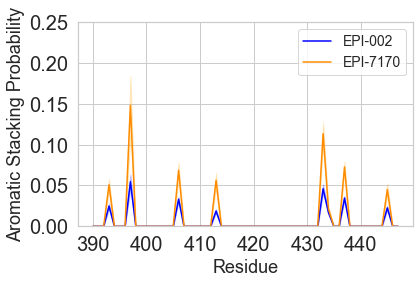

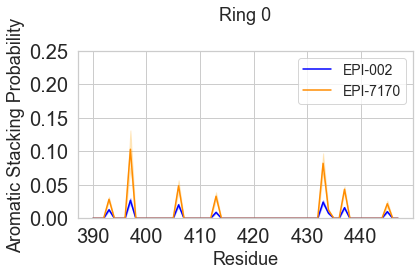

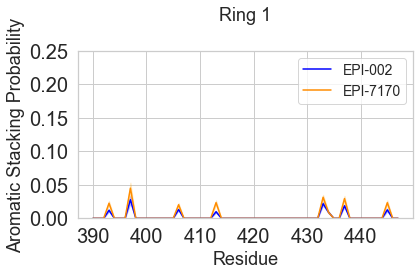

<Figure size 432x288 with 0 Axes>

In [17]:
# New p+t-stacking Defintion
file = 'aromatic_stacking.fraction.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.pdf' % outdir)
plt.show()
plt.clf()

file = 'aromatic_stacking.fraction.r0.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.title("Ring 0", size=18, pad=30)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.r0.pdf' % outdir)
plt.show()
plt.clf()
file = 'aromatic_stacking.fraction.r1.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.title("Ring 1", size=18, pad=30)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.r1.pdf' % outdir)
plt.show()
plt.clf()


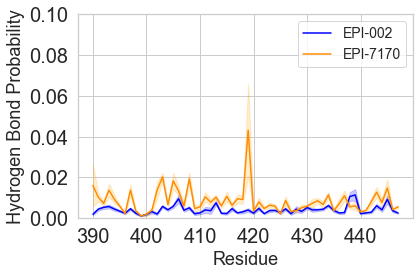

In [18]:
# 'HbondFraction.bound.dat'
# Compare Stacking
file = 'hbond_fraction.be.dat'
E2_Hbond = np.loadtxt(E2dir+file)
E7_Hbond = np.loadtxt(E7dir+file)

plt.plot(E2_Hbond[:, 0], E2_Hbond[:, 1], c='blue', label='EPI-002')
plt.plot(E7_Hbond[:, 0], E7_Hbond[:, 1], c='darkorange', label='EPI-7170')

plt.fill_between(E2_Hbond[:, 0], E2_Hbond[:, 1]+E2_Hbond[:, 2],
                 E2_Hbond[:, 1]-E2_Hbond[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_Hbond[:, 0], E7_Hbond[:, 1]+E7_Hbond[:, 2],
                 E7_Hbond[:, 1]-E7_Hbond[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.10)
plt.xlabel('Residue', size=18)
plt.ylabel('Hydrogen Bond Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.HBond.pdf' % outdir)
